In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

labels_train = []
labels_test = []


path_train = []
path_test = []

In [3]:
train_path = "/content/drive/MyDrive/train_ob"
test_path = "/content/drive/MyDrive/test_ob"

for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))


label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))


print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


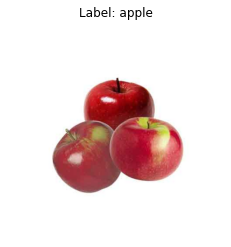

In [4]:
image = cv2.imread(path_train[19])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

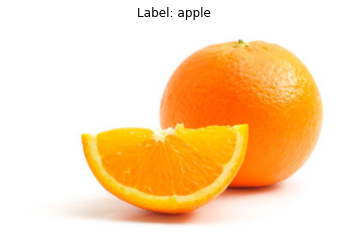

In [5]:
image = cv2.imread(path_test[27])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

In [6]:
X_train = []

for path in path_train:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_train.append(final_img)

X_train = np.array(X_train)
X_test = []

for path in path_test:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_test.append(final_img)

X_test = np.array(X_test)

In [7]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits    

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [8]:
# storing the values in a temporary list
temp_train = []
temp_test = []

# all the fruits names are being mapped
for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [9]:
y_train = keras.utils.np_utils.to_categorical(temp_train, 4)
y_test = keras.utils.np_utils.to_categorical(temp_test, 4)

Length of X_train:  240


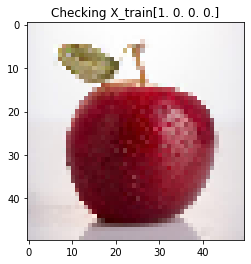

In [10]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[37])
plt.title("Checking X_train"+str(y_train[35]))
plt.show()

Length of X_test:  60


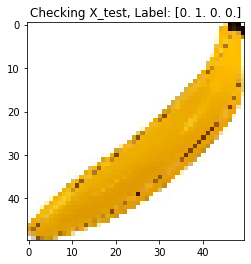

In [11]:
print("Length of X_test: ", len(X_test))
plt.imshow(X_test[47])
plt.title("Checking X_test, Label: " + str(y_test[47]))
plt.show()

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [14]:
adv_model = Sequential()

adv_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"))
adv_model.add(Conv2D(32, (3, 3), activation="relu"))
adv_model.add(MaxPooling2D(pool_size=(2, 2)))
adv_model.add(Dropout(0.25))

adv_model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
adv_model.add(Conv2D(64, (3, 3), activation="relu"))
adv_model.add(MaxPooling2D(pool_size=(2, 2)))
adv_model.add(Dropout(0.25))

adv_model.add(Flatten())
adv_model.add(Dense(512, activation="relu"))
adv_model.add(Dropout(0.5))
adv_model.add(Dense(4, activation="softmax"))

# Compile the model
adv_model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)
history =adv_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/150
6/6 [==============================] - 14s 100ms/step - loss: 1.3702 - accuracy: 0.3698 - val_loss: 1.6423 - val_accuracy: 0.1875
Epoch 2/150
6/6 [==============================] - 0s 29ms/step - loss: 1.0627 - accuracy: 0.4531 - val_loss: 2.6334 - val_accuracy: 0.0833
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7677 - accuracy: 0.7448 - val_loss: 3.6364 - val_accuracy: 0.2917
Epoch 4/150
6/6 [==============================] - 0s 28ms/step - loss: 0.4427 - accuracy: 0.8594 - val_loss: 5.1464 - val_accuracy: 0.4583
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.3601 - accuracy: 0.8594 - val_loss: 5.5422 - val_accuracy: 0.4583
Epoch 6/150
6/6 [==============================] - 0s 28ms/step - loss: 0.3913 - accuracy: 0.8542 - val_loss: 4.1121 - val_accuracy: 0.4583
Epoch 7/150
6/6 [==============================] - 0s 29ms/step - loss: 0.2486 - accuracy: 0.9115 - val_loss: 4.2488 - val_accuracy: 0.4167
Epoch 8/150
6/6 [=

In [15]:
Y_pred_ann = adv_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Accuracy OF PPNA: {}% \n'.format(accuracy_score(y_test,Y_pred_ann.round())))

Accuracy OF PPNA: 0.85% 



In [16]:
model_structure = adv_model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
adv_model.save_weights("model_weights.h5")

In [17]:
score, accuracy = adv_model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 16ms/step - loss: 2.9163 - accuracy: 0.8500
Test score achieved: 2.916278600692749
Test accuracy achieved: 0.8500000238418579


In [18]:
pred = adv_model.predict(X_test)

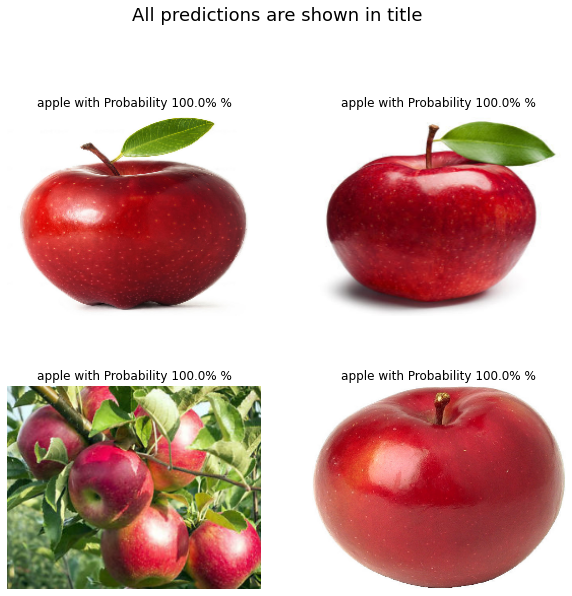

In [19]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(89.0, 97.0)

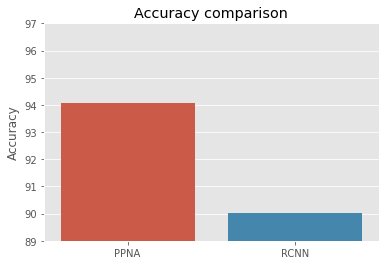

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
plt.style.use('ggplot')
x=['PPNA','RCNN']
accuracy=[94.06223,90.0232]

ax=sns.barplot(x,accuracy)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

low = min(accuracy)
high = max(accuracy)
ax.set_ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])